$\large{\text{\Huge{Applications of Taylor polynomials to approximate derivatives}}}$



$\large{\text{Suppose you need to solve some math problem on a computer that involves a derivative}}$
$\large{\text{Most coding languages do allow for symbolic arithmetic (what we think of as math)}}$


$\large{\text{Let's just look at a single thing we might do, taking derivatives.}}$

$\large{\text{Suppose we have a function, f, and we want to take its derivative and store it in the computer, so what do we do?}}$

\begin{equation}
  \frac{\partial f}{\partial x}= \text{?}
\end{equation}

$\large{\text{If you guessed use a Taylor polynomial, you'd be right}}.$
$\large{\text{Remember the conditions we require for the series }}$

$\large{\large{ \text{Taylor series:  If $f$  is infinitely differentiable then its Taylor Series centered around the point $x_0$ exists.}}}$

 
 $\begin{equation}
 \large { f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!} (x - x_0)^n}
 \end{equation}$

 
$\large{\text{We will introduce a bit of notation, keep in mind we are trying to approximate derivatives (id est limits)}}$

$\large{\text{Derivatives are taken at a point, that is our $x_0$, next we suppose that $x$ is close to $x_0$}}$
$\large{\text{In math that means $x=x_0 + h$, where $h$ is small.  You'll notice this is annoying vauge.}}$
$\large{\text{More on this later, back to the derivation}}$

$\large{\text{The Taylor series written out to three terms is:}}$

\begin{equation}
 \large f(x_0 + h ) = f(x_0) + h f'(x_0) + h^2 f''(x_0) + ...
\end{equation}

$\large{\text{We want the derivative at a point $x_0$, so lets manipulate to get that quantity isolated on one side}}$


\begin{equation}
 \large f'(x_0) = \frac{f(x_0 + h ) - f(x_0)}{h} - h f''(x_0) + ...
\end{equation}

$\large{\text{Because of computer limitiations, we cannot do the who infinite series written on the RHS}}$

$\large{\text{So we arrive at the two fundamental ideas of this course:}}$
<ol>
  <li>$\large{\text{We will have to estimate equations}}$</li>
  <li>$\large{\text{How "good" is that estimation?}}$</li>
</ol>

$\large{\text{So lets start making some estimates then figure out what the remainder looks like.}}$
$\large{\text{Note the first fraction looks like the definition of derivative, its missing the limit though.}}$
$\large{\text{So let's use that as an estimate:}}$

\begin{equation}
   \large{f'(x) \approx \frac{f(x_0 + h ) - f(x_0)}{h}}
\end{equation}

$\large{\text{Well there is an estimate, so onto question 2: how good is it?}}$
$\large{\text{There are lots of ways to measure how good, they are called metrics in math btw, but lets use the absolute error.}}$

\begin{equation}
   \large{ \|  f'(x) -  \frac{f(x_0 + h ) - f(x_0)}{h}  \|} = \| - h f''(x_0) + ... \|
\end{equation}

$\large{\text{Now let's plot how the error changes as $\Delta h \rightarrow 0 $ for $f(x)= \text{exp}(x) $, $f(x)= \text{sin}(x) $, $f(x)= \text{cos}(x) $ }} $



==================Starting unit test=================


Running unit test for f=exp @ x0=0, h=1e-1, Tol = h 
passed unit test
Running unit test for f=sin @ x0=0, h=1e-1, Tol = h 
passed unit test
Running unit test for f=cos @ x0=0, h=1e-1, Tol = h
passed unit test


==================Exiting unit test=================


Starting program to approximate derivatives of functions
Running convergence on exp


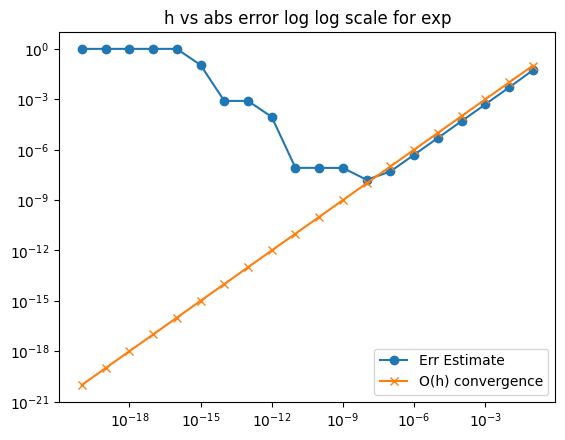

Running convergence on sin


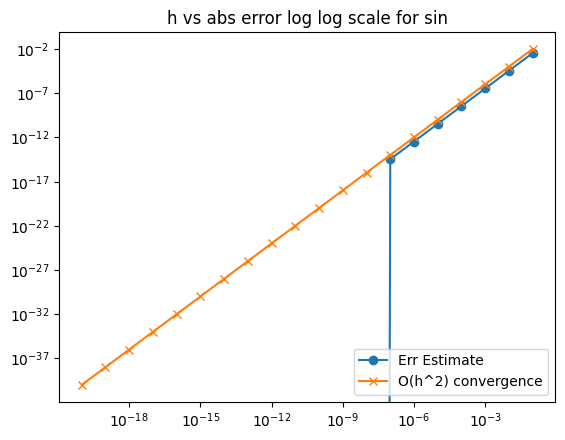

Running convergence on sin at x0=1


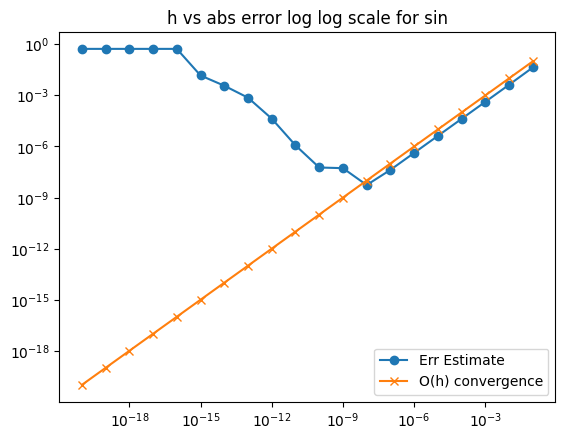

Running convergence on cos


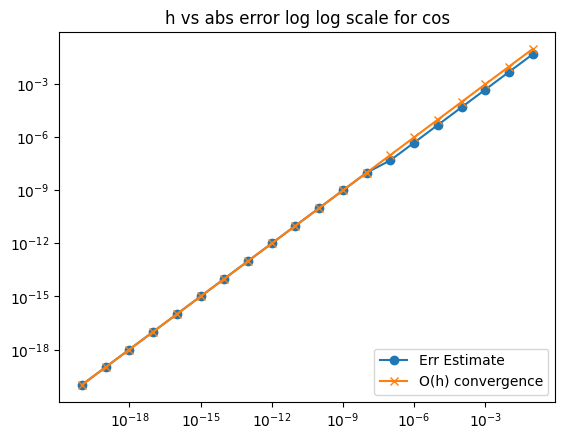

Running convergence on cos at x0=1


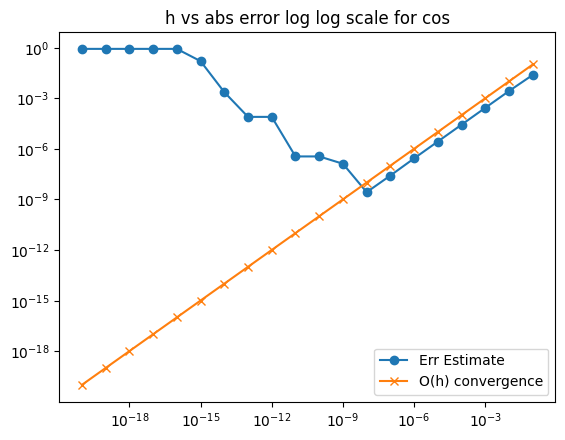

doing the lecture excercise
Running convergence on sin at x0=1.2


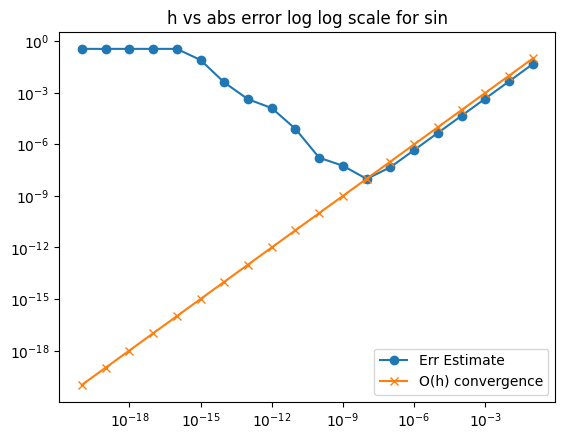

In [45]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
import unittest
#Define a function that gets the approximation of a function
#================================================================================
#Approximation of the derivative
#Variables
#h: stepsize
#x0: point we evaluate the function @
#func:  The function we are going to evaluate (For reusablility we are using an anonymous function)
def ddxApprox(h, x0, function) : 
    return (function(x0+h)- function(x0))/h # d/dx approx (f(x0 + h ) - f(x0)) /h
#================================================================================
#Generate the absolute error of the derivative 
#Variables
#h: stepsize
#x0 point we fix for evaluation
#df: Derivative of the function
#function: the anonymous function we are going to use to evaluate the point
def AbsErr(h, x0, df, dfm, function):
    return abs(dfm*df(x0+h) - ddxApprox(h,x0,function)) 
#===============================================================================
#End functions

#Basic unit testing without classes
#======================================================
def runTest(h, x0, df, dfm, function,Tol):
        if ( AbsErr(h, x0, df, dfm, function) > Tol) :
            print("failed unit test")
        else :
            print("passed unit test")
#======================================================
def RunTests():
    #Run initial tests before beginning
    print("\n\n==================Starting unit test=================\n\n")
    h = 1e-1
    x0= 0
    dfm = 1.0
    print("Running unit test for f=exp @ x0=0, h=1e-1, Tol = h ")
    runTest(h, x0, np.exp, dfm, np.exp, h) #Take h = 1e-1, x0=0, f = exp, df =1.0, f'=df*exp
    print("Running unit test for f=sin @ x0=0, h=1e-1, Tol = h ")
    runTest(h, 0, np.cos, 1.0, np.sin, h) #Take h = 1e-1, x0=0, f = exp, df =1.0, f'=df*exp
    print('Running unit test for f=cos @ x0=0, h=1e-1, Tol = h')
    runTest(h, 0, np.sin, -1.0, np.cos, h) #Take h = 1e-1, x0=0, f = cos, df =-1.0, f'=df*sin
    print("\n\n==================Exiting unit test=================\n\n")
#End unit testing
#========================================================   







#Main

RunTests() #Run unit tests

print("Starting program to approximate derivatives of functions")
N = 20  #Want to run N iterates
x0= 0
h=np.zeros(N) #Create an array of N stepsizes, zero initially 
Err = np.zeros(N) #Create an array for the error
func = np.exp # The function we want
df = np.exp #The derivative
dfm = 1 #If we need to scale df by derivative information, do it as in AbsErr
funcName = "exp"
print("Running convergence on " +funcName) 
for i in range(0,N): #loop N times 1:N
    h[i]=1e-1/float(10**i) # Set the step size to start at 1e-10 and divide by ten each time
    Err[i] = AbsErr(h[i], x0, df, dfm, func)  #Err[i] = abs(df- ddxApprox(h[i], x0, np.exp)) #Calculate (numerically) the abs error
#Plotting section
plt.plot(h, Err, marker="o", label="Err Estimate")
plt.plot(h, h, marker="x", label="O(h) convergence" ) 
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="lower right")
plt.title("h vs abs error log log scale for " + funcName)
plt.show() 


N = 20  #Want to run N iterates
x0= 0
h=np.zeros(N) #Create an array of N stepsizes, zero initially 
Err = np.zeros(N) #Create an array for the error
func = np.sin # The function we want
df = np.cos #The derivative
dfm = 1 #If we need to scale df by derivative information, do it as in AbsErr
funcName = "sin"
print("Running convergence on " +funcName) 
for i in range(0,N): #loop N times 1:N
    h[i]=1e-1/float(10**i) # Set the step size to start at 1e-10 and divide by ten each time
    Err[i] = AbsErr(h[i], x0, df, dfm, func)  #Err[i] = abs(df- ddxApprox(h[i], x0, np.exp)) #Calculate (numerically) the abs error
#Plotting section
plt.plot(h, Err, marker="o", label="Err Estimate")
plt.plot(h, h*h, marker="x", label="O(h^2) convergence" ) 
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="lower right")
plt.title("h vs abs error log log scale for " + funcName)
plt.show() 


N = 20  #Want to run N iterates
x0= 1
h=np.zeros(N) #Create an array of N stepsizes, zero initially 
Err = np.zeros(N) #Create an array for the error
func = np.sin # The function we want
df = np.cos #The derivative
dfm = 1 #If we need to scale df by derivative information, do it as in AbsErr
funcName = "sin"
print("Running convergence on " +funcName + " at x0=1") 
for i in range(0,N): #loop N times 1:N
    h[i]=1e-1/float(10**i) # Set the step size to start at 1e-10 and divide by ten each time
    Err[i] = AbsErr(h[i], x0, df, dfm, func)  #Err[i] = abs(df- ddxApprox(h[i], x0, np.exp)) #Calculate (numerically) the abs error
#Plotting section
plt.plot(h, Err, marker="o", label="Err Estimate")
plt.plot(h, h, marker="x", label="O(h) convergence" ) 
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="lower right")
plt.title("h vs abs error log log scale for " + funcName)
plt.show() 


N = 20  #Want to run N iterates
x0= 0
h=np.zeros(N) #Create an array of N stepsizes, zero initially 
Err = np.zeros(N) #Create an array for the error
func = np.cos # The function we want
df = np.sin #The derivative
dfm = -1 #If we need to scale df by derivative information, do it as in AbsErr
funcName = "cos"
print("Running convergence on " +funcName) 
for i in range(0,N): #loop N times 1:N
    h[i]=1e-1/float(10**i) # Set the step size to start at 1e-10 and divide by ten each time
    Err[i] = AbsErr(h[i], x0, df, dfm, func)  #Err[i] = abs(df- ddxApprox(h[i], x0, np.exp)) #Calculate (numerically) the abs error
#Plotting section
plt.plot(h, Err, marker="o", label="Err Estimate")
plt.plot(h, h, marker="x", label="O(h) convergence" ) 
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="lower right")
plt.title("h vs abs error log log scale for " + funcName)
plt.show()

N = 20  #Want to run N iterates
x0= 1
h=np.zeros(N) #Create an array of N stepsizes, zero initially 
Err = np.zeros(N) #Create an array for the error
func = np.cos # The function we want
df = np.sin #The derivative
dfm = -1 #If we need to scale df by derivative information, do it as in AbsErr
funcName = "cos"
print("Running convergence on " +funcName + " at x0=1") 
for i in range(0,N): #loop N times 1:N
    h[i]=1e-1/float(10**i) # Set the step size to start at 1e-10 and divide by ten each time
    Err[i] = AbsErr(h[i], x0, df, dfm, func)  #Err[i] = abs(df- ddxApprox(h[i], x0, np.exp)) #Calculate (numerically) the abs error
#Plotting section
plt.plot(h, Err, marker="o", label="Err Estimate")
plt.plot(h, h, marker="x", label="O(h) convergence" ) 
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="lower right")
plt.title("h vs abs error log log scale for " + funcName)
plt.show()


print("doing the lecture excercise")
N = 20  #Want to run N iterates
x0= 1.2
h=np.zeros(N) #Create an array of N stepsizes, zero initially 
Err = np.zeros(N) #Create an array for the error
func = np.sin # The function we want
df = np.cos #The derivative
dfm = 1 #If we need to scale df by derivative information, do it as in AbsErr
funcName = "sin"
print("Running convergence on " +funcName + " at x0=1.2") 
for i in range(0,N): #loop N times 1:N
    h[i]=1e-1/float(10**i) # Set the step size to start at 1e-10 and divide by ten each time
    Err[i] = AbsErr(h[i], x0, df, dfm, func)  #Err[i] = abs(df- ddxApprox(h[i], x0, np.exp)) #Calculate (numerically) the abs error
#Plotting section
plt.plot(h, Err, marker="o", label="Err Estimate")
plt.plot(h, h, marker="x", label="O(h) convergence" ) 
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="lower right")
plt.title("h vs abs error log log scale for " + funcName)
plt.show()

doing the lecture excercise
Running convergence on sin at x0=1.2


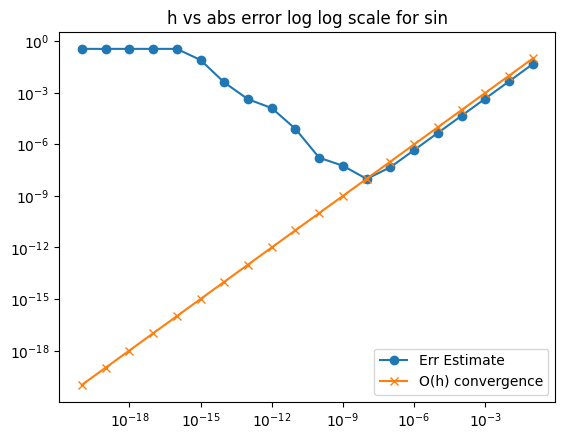

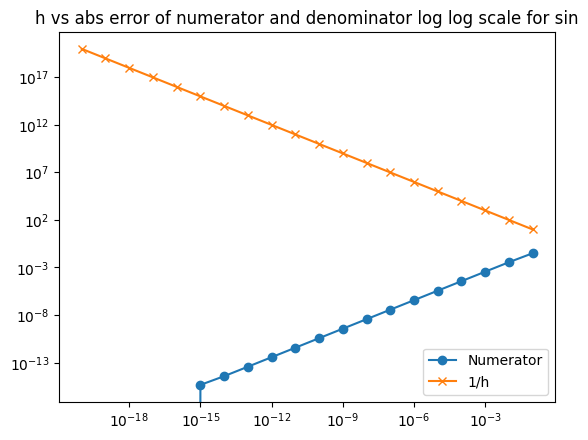

C:\Users\Jared Stewart\AppData\Local\Temp\ipykernel_11896\2332418940.py:31: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(h, 1/((np.sin(x0+h)-np.sin(x0))*h ), marker="o", label="Approximation")


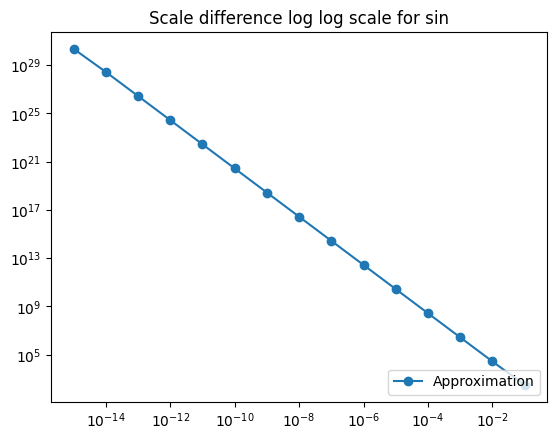

In [43]:
print("doing the lecture excercise")
N = 20  #Want to run N iterates
x0= 1.2
h=np.zeros(N) #Create an array of N stepsizes, zero initially 
Err = np.zeros(N) #Create an array for the error
func = np.sin # The function we want
df = np.cos #The derivative
dfm = 1 #If we need to scale df by derivative information, do it as in AbsErr
funcName = "sin"
print("Running convergence on " +funcName + " at x0=1.2") 
for i in range(0,N): #loop N times 1:N
    h[i]=1e-1/float(10**i) # Set the step size to start at 1e-10 and divide by ten each time
    Err[i] = AbsErr(h[i], x0, df, dfm, func)  #Err[i] = abs(df- ddxApprox(h[i], x0, np.exp)) #Calculate (numerically) the abs error
#Plotting section
plt.plot(h, Err, marker="o", label="Err Estimate")
plt.plot(h, h, marker="x", label="O(h) convergence" ) 
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="lower right")
plt.title("h vs abs error log log scale for " + funcName)
plt.show()

plt.plot(h, abs(func(x0+h)-func(x0)), marker="o", label="Numerator")
plt.plot(h, 1/h, marker="x", label="1/h" )
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="lower right")
plt.title("h vs abs error of numerator and denominator log log scale for " + funcName)
plt.show()

plt.plot(h, 1/((np.sin(x0+h)-np.sin(x0))*h ), marker="o", label="Approximation")
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="lower right")
plt.title("Scale difference log log scale for " + funcName)
plt.show()